In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import(
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"]=(10,5)

In [ ]:
df_raw = pd.read_csv("/content/Titanic-Dataset.csv")
df = df_raw.copy()

In [ ]:
# Data cleaning (Production grade)
# Standardize columns names
df.columns=(
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ","_")
)

In [ ]:
#Fix Data types
df['Survived']=df['survived'].astype(int)
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')


In [ ]:
#Missing value Treatment
# Age - Median
df['age']=df['age'].fillna(df['age'].median())

#Embarked - Mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

# Cabin -Drop(Too sparse)
df.drop(columns=['cabin'], inplace=True)

In [ ]:
# Duplicate Handling
df.drop_duplicates(inplace=True)

#Outlier Treatement (Capping)
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3-Q1

upper =Q3 + 1.5*IQR

df['fare']= np.where(df['fare']> upper, upper, df ['fare'])


In [ ]:
# Feature Engineering

#Create New Feature
df['family_size']= df['sibsp'] + df['parch']+1
df['is_alone']= np.where(df['family_size']== 1,1,0)


In [ ]:
#Encoding (ML Ready)
df['sex']= df['sex'].map({'male':0, 'female':1})
df['embarked']=df['embarked'].map({'S':0, 'C':1, 'Q':2})


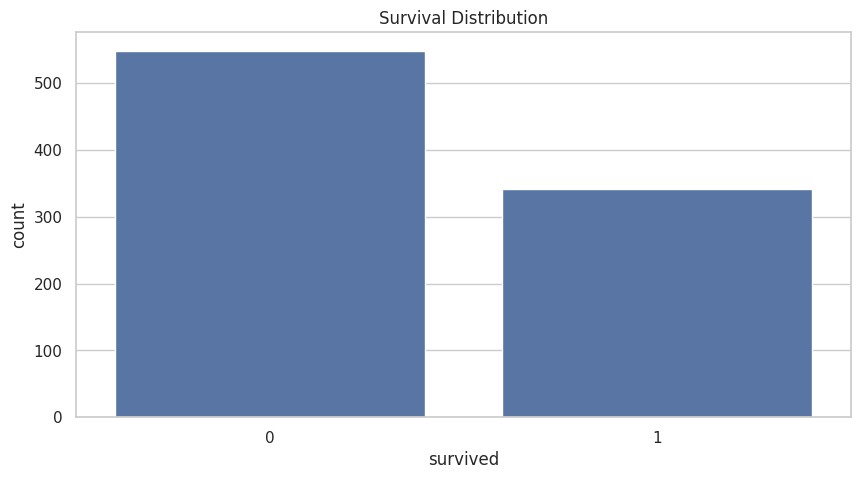

In [ ]:
#Exploratory data analysis
# Target Distribuion
sns.countplot(x='survived',data=df)
plt.title("Survival Distribution")
plt.show()

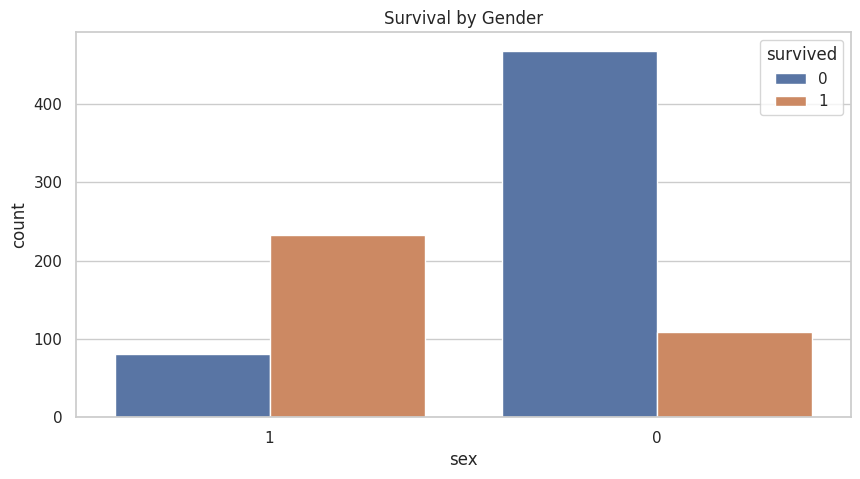

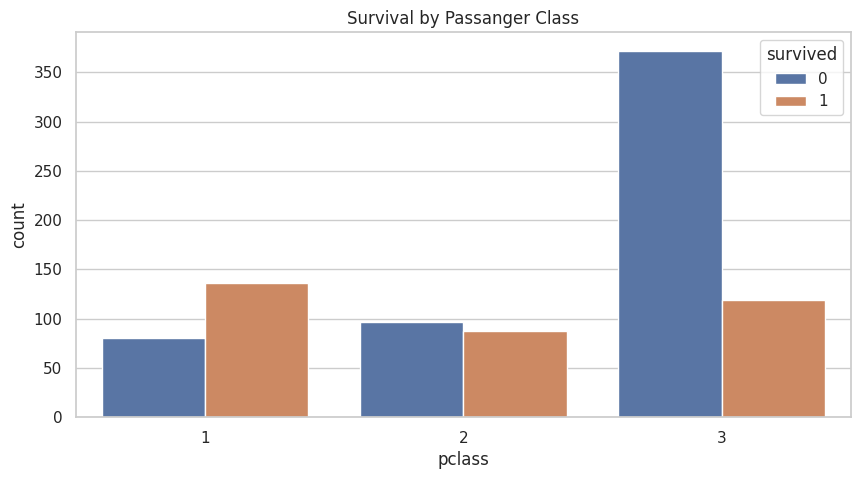

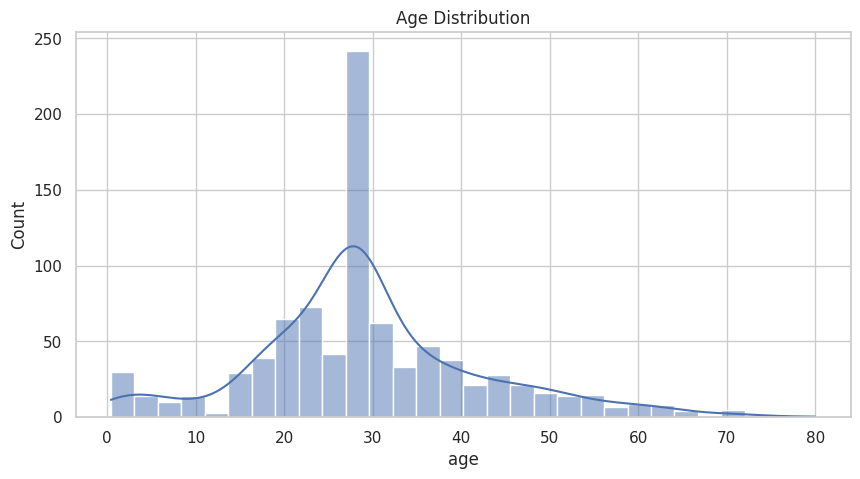

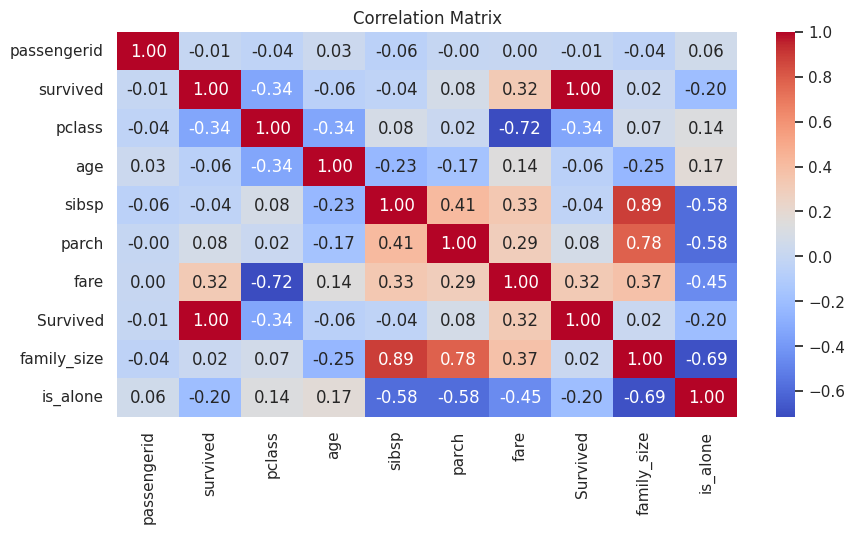

In [ ]:
#GEnder vs survival
sns.countplot(x='sex',hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()


# Class vs Survival
sns.countplot(x='pclass', hue='survived',data=df)
plt.title("Survival by Passanger Class")
plt.show()

#Age Distribution
sns.histplot(df['age'],bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

#Correlation Heatmap
corr = df.select_dtypes(include='number').corr()


sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
+++++++++++

In [ ]:
#MACHINE LEARNING PIPELINE
#Feature Selection
features =[
    'pclass','sex', 'age','fare',
    'family_size', 'is_alone', 'embarked'
]
X = df[features]
y = df['survived']

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

In [ ]:
# SAVE CLEAN DATA
df.to_csv("titanic_cleaned_final.csv", index=False)